## Predict if a person is diabetic using PIMA diabetes dataset

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Importing the dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### All the information about the dataset
* No of rows and columns  
* If the dataset contains any null values (NaN)
* The data type of the features (columns)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Correlation between the dataset

In [9]:
corrmat = df.corr()
corrmat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

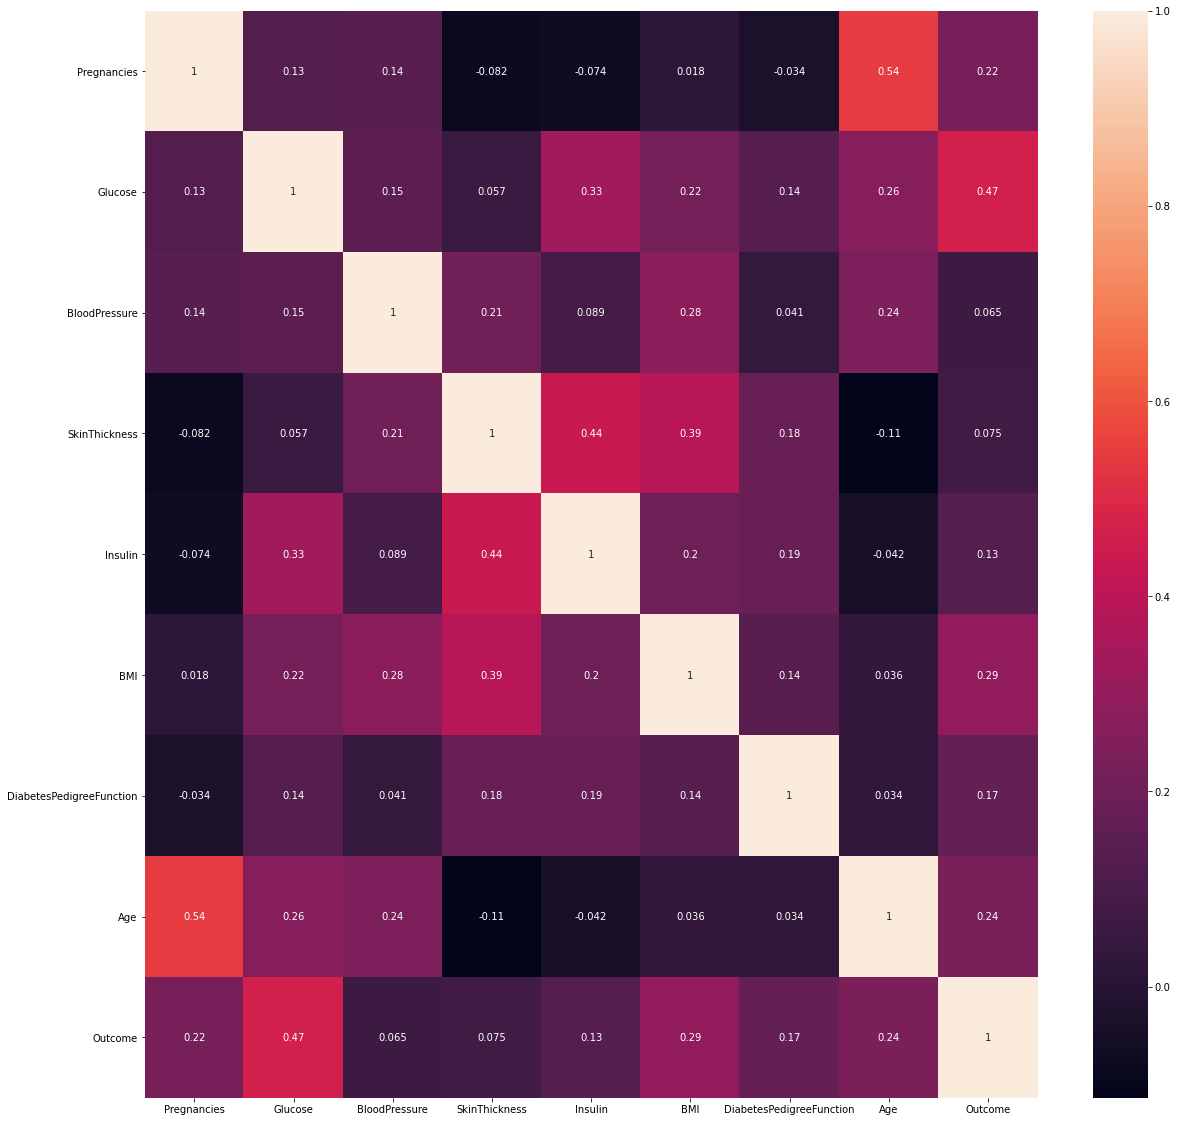

In [10]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df[corrmat.index].corr(), annot=True)

Finding the no of diabetic and Non diabetic person present in the dataset

In [15]:
diabetic = len(df.loc[df['Outcome']==1])
non_diabetic = len(df.loc[df['Outcome']==0])
print("Diabetic: {} \nNon Diabetic: {}".format(diabetic, non_diabetic))

Diabetic: 268 
Non Diabetic: 500


In [23]:
X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

### Spliting the model for training

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)
print("X train shape: {} and y train shape: {}".format(X_train.shape, y_train.shape))
print("X test shape: {} and y test shape: {}".format(X_test.shape, y_test.shape))

X train shape: (537, 8) and y train shape: (537,)
X test shape: (231, 8) and y test shape: (231,)


In [37]:
y_train[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

### Getting the number of missing values from all the features
Number of zeroes present in the features

In [28]:
def getzeroes(data):
    for i in data.columns:
        print("No of rows missing {}: {}".format(i,len(df.loc[df[i]==0])))
getzeroes(df)


No of rows missing Pregnancies: 111
No of rows missing Glucose: 5
No of rows missing BloodPressure: 35
No of rows missing SkinThickness: 227
No of rows missing Insulin: 374
No of rows missing BMI: 11
No of rows missing DiabetesPedigreeFunction: 0
No of rows missing Age: 0
No of rows missing Outcome: 500


### Converting all the zeros into non zeroes

In [38]:
from sklearn.impute import SimpleImputer
values_fill = SimpleImputer(missing_values=0, strategy="mean")
X_train = values_fill.fit_transform(X_train)
X_test = values_fill.fit_transform(X_test)
print("X train: {} \nX test: {}".format(X_train[0:5], X_test[0:5]))

X train: [[2.00000000e+00 8.90000000e+01 9.00000000e+01 3.00000000e+01
  1.59968641e+02 3.35000000e+01 2.92000000e-01 4.20000000e+01]
 [4.00000000e+00 1.46000000e+02 8.50000000e+01 2.70000000e+01
  1.00000000e+02 2.89000000e+01 1.89000000e-01 2.70000000e+01]
 [1.00000000e+01 1.11000000e+02 7.00000000e+01 2.70000000e+01
  1.59968641e+02 2.75000000e+01 1.41000000e-01 4.00000000e+01]
 [1.00000000e+00 9.90000000e+01 7.20000000e+01 3.00000000e+01
  1.80000000e+01 3.86000000e+01 4.12000000e-01 2.10000000e+01]
 [1.00000000e+00 7.10000000e+01 4.80000000e+01 1.80000000e+01
  7.60000000e+01 2.04000000e+01 3.23000000e-01 2.20000000e+01]] 
X test: [[4.00000000e+00 1.54000000e+02 7.20000000e+01 2.90000000e+01
  1.26000000e+02 3.13000000e+01 3.38000000e-01 3.70000000e+01]
 [2.00000000e+00 1.12000000e+02 8.60000000e+01 4.20000000e+01
  1.60000000e+02 3.84000000e+01 2.46000000e-01 2.80000000e+01]
 [1.00000000e+00 1.35000000e+02 5.40000000e+01 2.97986577e+01
  1.43691589e+02 2.67000000e+01 6.87000000e-

### Training the model

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(random_state=10)
rfm.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [41]:
y_pred = rfm.predict(X_test)

from sklearn import metrics
print("RandomForest accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

RandomForest accuracy: 0.7662337662337663


In [43]:
metrics.confusion_matrix(y_test, y_pred)

array([[130,  14],
       [ 40,  47]], dtype=int64)